In [1]:
import os, sys

import numpy as np
import time
import copy
from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from torch import nn
import torch
from torch.optim import Adam
from torch.distributions import Categorical

In [2]:
from method_1 import SearchAvailablePosition
from method_2 import SearchAction
from method_3 import ChangeBoard

from Othello import Othello

In [3]:
from RL.train_model import test, get_play_data, randomAgent, greedyAgent
from RL.model import Model
from RL.optimize_model import optimize_model
from RL.Deep_agent import agent as deep_agent

#test()

In [4]:
x = torch.tensor(4.0, requires_grad = True)
c = torch.tensor(8.0)
b = 5.0
y = c*x + b

print(f"y   {y}")
y.backward()
print(f"x   {x}")
print(f"x.grad   {x.grad}")

y   37.0
x   4.0
x.grad   8.0


In [5]:
x = torch.rand(size=(3,5), requires_grad = True)
c = torch.tensor(8.0)
b = 5.0
y = c*x + b

y = y.sum()

print(f"y   {y}")
y.backward()
print(f"x   {x}")
print(f"x.grad   {x.grad}")

y   124.73444366455078
x   tensor([[0.0823, 0.3339, 0.0634, 0.3556, 0.7898],
        [0.3090, 0.5258, 0.0084, 0.0732, 0.8447],
        [0.4150, 0.3501, 0.3760, 0.9143, 0.7752]], requires_grad=True)
x.grad   tensor([[8., 8., 8., 8., 8.],
        [8., 8., 8., 8., 8.],
        [8., 8., 8., 8., 8.]])


In [6]:
x = torch.rand(size=(2,2), requires_grad = True)
c = torch.tensor(8.0)
b = 5.0
y = c*(x**2) + b

#x_0 = copy.deepcopy(x)
#y*=x_0.detach()

y = y.sum()

print(f"y   {y}")
y.backward()
print(f"x   {x}")
print(f"x.grad   {x.grad}")

print(16*x)

y   30.98832893371582
x   tensor([[0.7824, 0.7777],
        [0.2455, 0.3103]], requires_grad=True)
x.grad   tensor([[12.5182, 12.4438],
        [ 3.9277,  4.9644]])
tensor([[12.5182, 12.4438],
        [ 3.9277,  4.9644]], grad_fn=<MulBackward0>)


In [7]:
x = torch.rand(size=(2,10), requires_grad = True)
c = torch.tensor(8.0)
b = 5.0
y = c*x + b

#これで勾配を消せる
#y[:,-3:]=0
y[x>0.4]=0
print(x>0.4)

y = y.sum()

print(f"y   {y}")
y.backward()
print(f"x   {x}")
print(f"x.grad   {x.grad}")

tensor([[ True,  True,  True,  True, False, False,  True, False,  True,  True],
        [ True, False, False,  True, False,  True,  True, False, False, False]])
y   58.1185302734375
x   tensor([[0.5387, 0.7532, 0.4246, 0.5066, 0.1656, 0.2122, 0.5147, 0.0804, 0.4883,
         0.9797],
        [0.9943, 0.2761, 0.3482, 0.5959, 0.1138, 0.9182, 0.6152, 0.0276, 0.0378,
         0.3783]], requires_grad=True)
x.grad   tensor([[0., 0., 0., 0., 8., 8., 0., 8., 0., 0.],
        [0., 8., 8., 0., 8., 0., 0., 8., 8., 8.]])


In [8]:
#model = Model(3)
#optimizer = Adam(model.parameters(), lr=1e-4)
#batch_size=128

#agent_1 = randomAgent()
#agent_2 = greedyAgent()
agent_1 = deep_agent(input_dim=3, lam=0.6, gamma=.8, lr=1e-4)
agent_2 = deep_agent(input_dim=3, lam=0.6, gamma=.8, lr=1e-4)

data_first, data_secound = get_play_data(agent_1, agent_2)

In [9]:
l=[]
random_agent = randomAgent()

In [11]:
for i in tqdm(range(1000)):
    transactions = [get_play_data(agent_1 ,random_agent)[0] for _ in range(3)]
    policy_loss, value_loss, entropy, othello_loss = optimize_model(agent_1.model, transactions, agent_1.optimizer)
    l.append([
        policy_loss, value_loss, entropy, othello_loss
    ])

KeyboardInterrupt: 

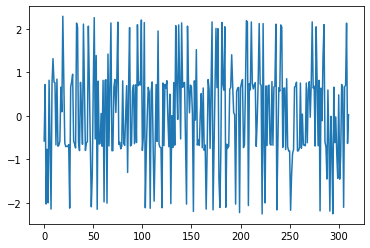

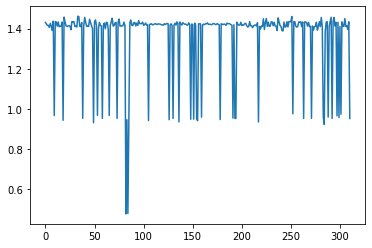

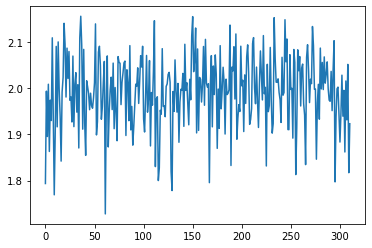

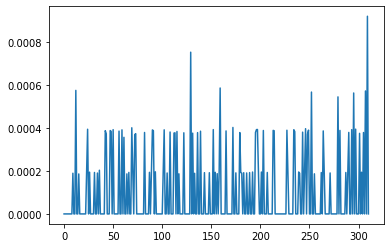

In [12]:
l = np.array(l)
plt.plot(l[:,0])
plt.show()
plt.plot(l[:,1])
plt.show()
plt.plot(l[:,2])
plt.show()
plt.plot(l[:,3])
plt.show()

In [13]:
torch.cat([agent_1.model(d['states'])["policy"] for d in transactions], dim=0).argsort(1)

tensor([[ 0,  1,  2,  ..., 61, 62, 63],
        [ 0,  1,  2,  ..., 61, 62, 44],
        [ 0,  1,  2,  ..., 61, 23, 44],
        ...,
        [ 0,  1,  2,  ..., 25, 45, 29],
        [ 0,  1,  2,  ..., 21, 18, 20],
        [ 0,  1,  2,  ..., 43, 29, 20]])

In [14]:
s = torch.cat([transaction['states'] for transaction in transactions], dim=0)
policy = agent_1.model(s)["policy"]

In [15]:
m = Categorical(probs=torch.nn.Softmax(1)(policy))
m.probs

tensor([[0.0156, 0.0156, 0.0156,  ..., 0.0156, 0.0156, 0.0156],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       grad_fn=<DivBackward0>)

In [16]:
m.sample().size()

torch.Size([94])

In [17]:
m.probs.gather(1, m.probs.argsort(1))

tensor([[0.0156, 0.0156, 0.0156,  ..., 0.0156, 0.0156, 0.0156],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.4722, 0.5278],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.2265, 0.2612, 0.3035],
        [0.0000, 0.0000, 0.0000,  ..., 0.1992, 0.2115, 0.2451],
        [0.0000, 0.0000, 0.0000,  ..., 0.2223, 0.2828, 0.3015]],
       grad_fn=<GatherBackward>)

In [18]:
policy.gather(1, policy.argsort(1))[:,-5:]

tensor([[-1.0000e+25, -1.0000e+25, -1.0000e+25,  ..., -1.0000e+25,
         -1.0000e+25, -1.0000e+25],
        [-1.0000e+25, -1.0000e+25, -1.0000e+25,  ..., -1.0000e+25,
         -1.0000e+25, -4.2595e-03],
        [-1.0000e+25, -1.0000e+25, -1.0000e+25,  ..., -1.0000e+25,
         -1.1772e-01, -6.4007e-03],
        ...,
        [-1.0000e+25, -1.0000e+25, -1.0000e+25,  ..., -1.5653e-01,
         -1.4199e-02,  1.3593e-01],
        [-1.0000e+25, -1.0000e+25, -1.0000e+25,  ..., -6.0385e-03,
          5.4016e-02,  2.0122e-01],
        [-1.0000e+25, -1.0000e+25, -1.0000e+25,  ..., -1.0245e-01,
          1.3802e-01,  2.0222e-01]], grad_fn=<GatherBackward>)

In [19]:
policy[10][58], policy[10][0]

(tensor(-1.0000e+25, grad_fn=<SelectBackward>),
 tensor(-1.0000e+25, grad_fn=<SelectBackward>))

In [21]:
print(s[:,2,:,:].flatten(1).gather(1, policy.argsort(1))[:,-4:].tolist())

[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 9.0], [0.0, 0.0, 3.0, 6.0], [0.0, 2.0, 3.0, 3.0], [2.0, 4.0, 5.0, 3.0], [4.0, 4.0, 3.0, 3.0], [3.0, 5.0, 3.0, 4.0], [2.0, 4.0, 3.0, 5.0], [1.0, 1.0, 1.0, 5.0], [6.0, 4.0, 5.0, 1.0], [6.0, 4.0, 5.0, 1.0], [4.0, 5.0, 1.0, 1.0], [1.0, 5.0, 1.0, 2.0], [1.0, 2.0, 7.0, 4.0], [5.0, 3.0, 2.0, 4.0], [3.0, 4.0, 3.0, 1.0], [3.0, 2.0, 3.0, 2.0], [2.0, 3.0, 2.0, 2.0], [2.0, 3.0, 3.0, 2.0], [3.0, 3.0, 4.0, 1.0], [1.0, 4.0, 3.0, 3.0], [1.0, 1.0, 1.0, 3.0], [1.0, 1.0, 1.0, 3.0], [1.0, 4.0, 2.0, 2.0], [1.0, 2.0, 2.0, 2.0], [1.0, 2.0, 1.0, 1.0], [1.0, 2.0, 1.0, 1.0], [1.0, 2.0, 1.0, 1.0], [1.0, 1.0, 1.0, 2.0], [1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 4.0], [0.0, 4.0, 4.0, 4.0], [2.0, 4.0, 4.0, 4.0], [2.0, 11.0, 7.0, 7.0], [3.0, 3.0, 4.0, 4.0], [3.0, 2.0, 3.0, 3.0], [0.0, 0.0, 4.0, 5.0], [1.0, 1.0, 3.0, 5.0], [4.0, 1.0, 3.0, 5.0], [1.0, 2.0, 3.0, 5.0], [2.0, 3.0, 3.0, 1.0], [8.0, 3.0, 1.0, 4.0], [6.0, 1.0, 1.0, 2.0], [6.0, 1.

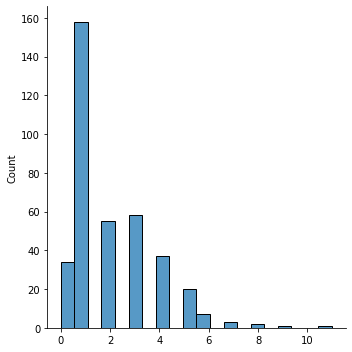

In [22]:
sns.displot(s[:,2,:,:].flatten(1).gather(1, policy.argsort(1))[:,-4:].detach().numpy().flatten())
plt.show()

In [23]:
random_agent = randomAgent()

In [24]:
othello = Othello()

w_1=0
w_2=0
draw=0

In [25]:
for _ in tqdm(range(2000)):
    board, changeable_Pos, Position_Row, Position_Col, Change_Position, done = othello.make()
    while not done:
        if othello.color==1:
            setrow, setcol = agent_1.take_action(board, changeable_Pos, Position_Row, Position_Col, Change_Position)
        else:
            setrow, setcol = random_agent.take_action(board, changeable_Pos, Position_Row, Position_Col, Change_Position)
        board, changeable_Pos, Position_Row, Position_Col, Change_Position, done = othello.step(setrow, setcol)
        if done:
            if len(board[board==1])>len(board[board==2]):
                w_1+=1
            elif len(board[board==1])<len(board[board==2]):
                w_2+=1
            else:
                draw+=1

KeyboardInterrupt: 

In [26]:
print(w_1,w_2,draw)

115 110 13


In [58]:
a = data_first['states'][:,2,:,:]
a.size()

torch.Size([32, 8, 8])

In [111]:
a.mean(1).mean(1).unsqueeze(1)

tensor([[0.0000],
        [0.0156],
        [0.1719],
        [0.2344],
        [0.2656],
        [0.2500],
        [0.2344],
        [0.4844],
        [0.6875],
        [0.5000],
        [0.4531],
        [0.5469],
        [0.6250],
        [0.4688],
        [0.3906],
        [0.3125],
        [0.4062],
        [0.3125],
        [0.4375],
        [0.4531],
        [0.4688],
        [0.4219],
        [0.2500],
        [0.2812],
        [0.2500],
        [0.2656],
        [0.2344],
        [0.1562],
        [0.1719],
        [0.1250],
        [0.1094],
        [0.0625]])

In [112]:
a.flatten(1)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [3., 0., 7.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [90]:
a.flatten(1)-a.mean(1).mean(1).unsqueeze(1)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.9688, -0.0312, -0.0312,  ..., -0.0312, -0.0312, -0.0312],
        [ 0.9219, -0.0781, -0.0781,  ..., -0.0781, -0.0781, -0.0781],
        ...,
        [-0.1094, -0.1094, -0.1094,  ..., -0.1094, -0.1094, -0.1094],
        [-0.1094, -0.1094, -0.1094,  ..., -0.1094, -0.1094, -0.1094],
        [-0.0625, -0.0625, -0.0625,  ..., -0.0625, -0.0625, -0.0625]])

In [91]:
policy.argsort(1)[:,-7:]

tensor([[57, 40, 63, 38, 51, 61, 30],
        [57, 40, 63, 38, 51, 61, 30],
        [57, 40, 63, 38, 51, 61, 30],
        [21, 40, 63, 38, 51, 61, 30],
        [21, 40, 38, 63, 51, 61, 30],
        [21, 40, 38, 63, 51, 61, 30],
        [21, 38, 40, 63, 51, 61, 30],
        [21, 38, 40, 63, 51, 61, 30],
        [21, 38, 40, 63, 51, 61, 30],
        [21, 38, 40, 63, 51, 61, 30],
        [57, 38, 40, 63, 61, 51, 30],
        [21, 38, 40, 63, 51, 61, 30],
        [21, 38, 40, 63, 51, 61, 30],
        [57, 38, 40, 63, 51, 61, 30],
        [21, 38, 40, 63, 51, 61, 30],
        [21, 38, 40, 63, 61, 51, 30],
        [21, 38, 40, 63, 61, 51, 30],
        [21, 38, 40, 63, 51, 61, 30],
        [21, 38, 40, 63, 51, 61, 30],
        [57, 38, 40, 63, 51, 61, 30],
        [57, 40, 38, 63, 51, 61, 30],
        [21, 40, 38, 63, 51, 61, 30],
        [57, 38, 40, 63, 51, 61, 30],
        [21, 38, 40, 63, 61, 51, 30],
        [21, 38, 40, 63, 51, 61, 30],
        [21, 38, 40, 63, 51, 61, 30],
        [21,

In [57]:
policy.gather(1,policy.argsort(1))

tensor([[-0.1958, -0.1921, -0.1858,  ...,  0.1819,  0.1984,  0.2361],
        [-0.1960, -0.1917, -0.1859,  ...,  0.1813,  0.1982,  0.2360],
        [-0.2004, -0.1895, -0.1873,  ...,  0.1860,  0.2037,  0.2381],
        ...,
        [-0.1969, -0.1962, -0.1873,  ...,  0.1881,  0.2025,  0.2423],
        [-0.1963, -0.1876, -0.1871,  ...,  0.1904,  0.2055,  0.2425],
        [-0.1925, -0.1889, -0.1876,  ...,  0.1913,  0.2038,  0.2407]],
       grad_fn=<GatherBackward>)

In [44]:
data_first["states"][-2],data_first["actions"][-1]

(tensor([[[0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 1., 1., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 1., 1., 1., 1., 1., 0.],
          [0., 0., 0., 0.,

In [52]:
a = torch.rand(4)[torch.rand(4)>10]
if  torch.isnan(a).all():
    print("c")
a

c


tensor([])

In [33]:
a = torch.distributions.Categorical(torch.rand(2,2))
a.probs

tensor([[0.5473, 0.4527],
        [0.6790, 0.3210]])

In [31]:
data_first["states"][1:,2,:,:].flatten(1)

tensor([[6., 0., 0.,  ..., 0., 0., 0.],
        [6., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 6.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [23]:
34//8, 34%8

(4, 2)

In [7]:
loss_1_l = []
loss_2_l = []
loss_3_l = []
for i in range(30):
    transactions = [get_play_data(agent_1, agent_2)[0] for _ in (range(20))]
    if i%3==0:
        target_model.load_state_dict(policy_model.state_dict())
    loss_1, loss_2, loss_3 = optimize_model(policy_model, target_model, transactions, optimizer)
    loss_1_l.append(loss_1)
    loss_2_l.append(loss_2)
    loss_3_l.append(loss_3)

100%|██████████| 20/20 [00:00<00:00, 28.72it/s]


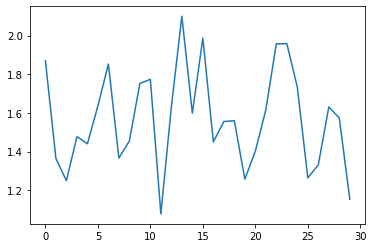

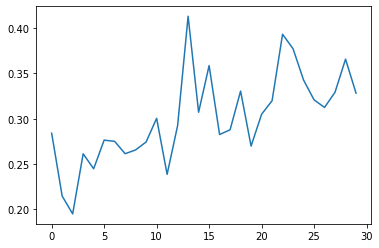

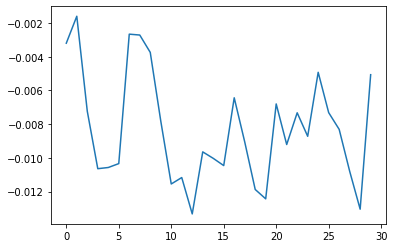

In [26]:
plt.plot(loss_1_l)
plt.show()
plt.plot(loss_2_l)
plt.show()
plt.plot(loss_3_l)
plt.show()

In [19]:
states = transactions[0]['states']
policy = policy_model(states)['policy']

In [20]:
s = states[:,2,:,:].flatten(1)

In [21]:
policy.size(),s.size()

(torch.Size([31, 64]), torch.Size([31, 64]))

In [186]:
out = model(first_states)
policy = out["policy"]
value = out["value"]

In [187]:
first_states[:,2,:,:].flatten(1).size()

torch.Size([32, 64])

In [188]:
def calu_returns(transactions, gamma):
    gamma=0.9
    returns = deque()

    r = transactions[0]
    r = r.tolist()
    returns.append(r)

    for i, r in enumerate(transactions[1:]):
        r = r.tolist()
        _return = r+gamma*returns[-1]
        returns.append(_return)
    return torch.FloatTensor(returns)

In [191]:
#first_states[:,2,:,:]

In [192]:
print(calu_othello_loss(policy, first_states))

tensor(0.0075, grad_fn=<AddBackward0>)


In [193]:
first_returns = calu_returns(first_rewards, 0.9)
second_returns = calu_returns(second_rewards, 0.9)

In [195]:
td_target_value = calu_td_target_value(value, first_rewards)
print(calu_policy_loss(policy, first_actions, value, td_target_value))
print(calu_td_value_loss(value, td_target_value))
print(calu_othello_loss(policy, first_states))

tensor(-1.8985, grad_fn=<MeanBackward0>)
tensor(0.1358, grad_fn=<MeanBackward0>)
tensor(0.0075, grad_fn=<AddBackward0>)


In [181]:
(td_target_value-value.flatten()[1:]).size()

torch.Size([9])

In [142]:
(td_target_value-value.flatten()[1:])

tensor([ 0.1916, -0.0019,  0.0846, -0.0150,  0.2206,  0.4516,  0.0081,  0.1287,
         0.1400], grad_fn=<SubBackward0>)

tensor([-0.7918,  0.0082, -0.3508,  0.0609, -0.9173, -1.9074, -0.0347, -0.5208,
        -0.5720], grad_fn=<MulBackward0>)

In [181]:
for p in out['policy']:
    print(p)
    
for v in out['value']:
    print(v)

tensor([-0.1433, -0.3086, -0.0491,  0.2047, -0.0419,  0.0357, -0.0113, -0.1363,
         0.2031, -0.2606,  0.4776, -0.3875, -0.1418,  0.1633,  0.1334, -0.2816,
         0.2821,  0.2436, -0.0273, -0.1021, -0.0542,  0.4434, -0.2900,  0.1250,
         0.3784, -0.2369, -0.0857, -0.1326,  0.0399, -0.0073,  0.0085, -0.3751,
        -0.2433, -0.1579, -0.1150,  0.1343,  0.0556, -0.0039, -0.0494, -0.3564,
         0.4086,  0.2798, -0.0303,  0.1646, -0.1600,  0.1468,  0.0650, -0.0718,
         0.0945, -0.0791, -0.2441, -0.2613,  0.0036, -0.0273, -0.2254, -0.0907,
        -0.0119, -0.4299,  0.1199, -0.1271,  0.1742,  0.4167, -0.2043,  0.2062],
       grad_fn=<UnbindBackward>)
tensor([ 0.3352, -0.4085, -0.0261,  0.0625, -0.2373, -0.0718, -0.1644, -0.0255,
         0.1892, -0.1003,  0.0806, -0.3567,  0.0252,  0.1796,  0.2442, -0.3232,
         0.1725, -0.0366, -0.0127, -0.4247, -0.0587, -0.0267,  0.1076,  0.3166,
         0.0377, -0.0889, -0.2642,  0.2273,  0.0524,  0.0524,  0.1362,  0.1660,
      

In [160]:
out['value']

tensor([[-7.5877e-03],
        [ 1.0154e-01],
        [ 6.2535e-03],
        [ 8.5554e-02],
        [ 3.5614e-01],
        [ 1.4319e-01],
        [-6.1794e-02],
        [ 1.5533e-02],
        [ 5.6916e-02],
        [-1.2189e-03],
        [-3.4378e-03],
        [ 1.9341e-01],
        [-2.2364e-01],
        [ 2.6067e-02],
        [-9.4526e-02],
        [-7.8299e-02],
        [-1.3736e-01],
        [ 1.9306e-02],
        [-1.1456e-01],
        [-1.3760e-02],
        [ 4.4889e-01],
        [ 3.4894e-02],
        [ 4.4454e-02],
        [ 3.9229e-04],
        [ 1.1723e-01],
        [-2.1249e-02],
        [ 5.0183e-02],
        [ 1.4693e-03],
        [-4.9482e-02],
        [ 3.7538e-02],
        [ 2.1007e-01],
        [ 1.9705e-02]], grad_fn=<AddmmBackward>)

In [158]:
first_rewards.sum(), second_rewards.sum()

(tensor(11.5000), tensor(19.7812))

In [157]:
first_rewards, second_rewards

(tensor([0.0938, 0.0938, 0.0625, 0.0938, 0.0625, 0.0938, 0.0938, 0.1562, 0.1562,
         0.1250, 0.1250, 0.2188, 0.1562, 0.1875, 0.2500, 0.2188, 0.1875, 0.1562,
         0.1250, 0.2188, 0.2812, 0.4375, 0.5312, 0.5938, 0.7812, 0.7812, 0.9062,
         1.0000, 1.0000, 1.0312, 1.2812]),
 tensor([0.0625, 0.1250, 0.1875, 0.2500, 0.3125, 0.3750, 0.3750, 0.3750, 0.4688,
         0.5938, 0.5938, 0.5938, 0.7188, 0.7188, 0.7500, 0.8125, 0.9688, 1.0312,
         1.0625, 1.0000, 0.9688, 0.9688, 0.9375, 0.8125, 0.7500, 0.8125, 0.8438,
         0.7188, 0.8750, 0.7188]))

In [143]:
first_values

tensor([-0.0000, -0.0011, -0.0044, -0.0100, -0.0178, -0.0278, -0.0400, -0.0544,
        -0.0711, -0.0900, -0.1111, -0.1344, -0.1600, -0.1878, -0.2178, -0.2500,
        -0.2844, -0.3211, -0.3600, -0.4011, -0.4444, -0.4900, -0.5378, -0.5878,
        -0.6400, -0.6944, -0.7511, -0.8100, -0.8711, -0.9344, -1.0000])

In [99]:
len(board[board==1]), len(board[board==2])

(35, 29)

In [55]:
#reward and action num are state_num-1

In [22]:
done, othello.color, othello.num_step

(True, 2, 61)

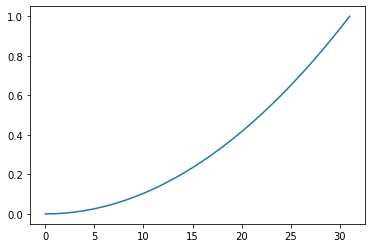

In [23]:
x = np.arange(0,32)
y = (x)**2/(x.max())**2
plt.plot(x, y)
plt.show()

In [24]:
out_x = model(first_states)

In [25]:
x_2 = first_states[:,2,:,:]
policy = out_x['policy']

In [26]:
policy[:-1,:].size()

torch.Size([30, 64])

In [27]:
first_actions.size(), policy.size(), first_actions

(torch.Size([30]),
 torch.Size([31, 64]),
 tensor([43., 17., 20., 42., 21., 59., 33., 14., 41., 19., 31., 13.,  3., 45.,
         15.,  4., 22., 24., 50., 54., 40., 37.,  1., 58., 16., 55., 52.,  0.,
          6., 56.]))

In [135]:
i=0
for p in policy:
    #a = int(first_actions[i])
    #print(p[a])
    i+=1

In [136]:
#torch.gather(policy, 1,first_actions.to(torch.int64).reshape(-1,1))

In [137]:
x_2[x_2==0].size()

torch.Size([1742])

In [138]:
policy[x_2.flatten(1)==0]

tensor([-13.6725,  -1.8027, -10.5650,  ...,  -0.4125,  -1.1987,   1.1237],
       grad_fn=<IndexBackward>)

In [139]:
out_x['policy'].size(), out_x['value'].size()

(torch.Size([31, 64]), torch.Size([31, 1]))

In [140]:
nn.LogSoftmax(dim=1)(out_x['policy'])

tensor([[-29.3239, -17.4541, -26.2164,  ..., -24.4874, -19.4835, -28.2653],
        [-25.2876,  -8.1405, -24.6962,  ..., -26.0127, -16.9873, -29.0492],
        [-28.0255, -13.8862, -24.6423,  ..., -21.7940, -13.2426, -26.1142],
        ...,
        [-10.4909,  -4.4472,  -9.5018,  ...,  -8.0709,  -3.2448,  -9.2331],
        [ -6.6633,  -3.2358,  -6.4610,  ...,  -5.8358,  -3.0276,  -6.3845],
        [ -5.9357,  -4.0014,  -5.8276,  ...,  -5.1272,  -2.8048,  -5.3968]],
       grad_fn=<LogSoftmaxBackward>)

In [141]:
len(board[board==1]), len(board[board==2])

(47, 17)

In [188]:
states[:,2,:,:].flatten(1).max()

tensor(10.)

In [207]:

loss_l = []
model = Model(3)
optim = torch.optim.Adam(model.parameters(), lr=0.001)
for _ in tqdm(range(500)):
    model = model.eval()
    out = model(states)
    #policy = nn.Softmax(dim=1)(out['policy'])
    policy = nn.Sigmoid()(out['policy'])
    
    label = copy.deepcopy(states[:,2,:,:])
    label = label.flatten(1)
    label[label>0]=1
    
    loss = 0.05*((label-policy)**2).mean()
    optim.zero_grad()
    loss.backward()
    loss_l.append(loss.item())
    optim.step()

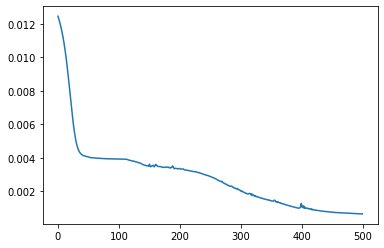

In [208]:
plt.plot(loss_l)

In [209]:
label.max()

tensor(1.)

In [210]:
policy.max(1)

torch.return_types.max(
values=tensor([0.9479, 0.9906, 0.9179, 0.9848, 0.9979, 0.9224, 0.9885, 0.9964, 1.0000,
        0.9994, 1.0000, 1.0000, 1.0000, 0.9995, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 0.9998, 1.0000, 1.0000, 1.0000, 1.0000, 0.9999,
        0.9997, 1.0000, 0.9995, 1.0000, 1.0000, 1.0000, 0.9995, 1.0000, 0.9848,
        1.0000, 0.9828, 1.0000, 0.9628, 1.0000, 0.9675, 1.0000, 0.0871, 1.0000,
        0.8312, 1.0000, 0.9058, 1.0000, 0.9920, 0.9995, 0.9912, 1.0000, 0.9789,
        1.0000, 0.6480, 0.9998, 0.8519, 0.8997, 0.3360, 0.3596, 0.3185],
       grad_fn=<MaxBackward0>),
indices=tensor([20, 42, 20, 42, 34, 21, 42, 18, 33, 44, 33, 44, 33, 18, 30, 42, 33, 42,
        30, 42, 33, 21, 33, 61, 33, 38, 30, 11, 30, 33, 30, 30, 30, 33, 30, 18,
        30, 18, 30, 18, 30, 18, 30, 18, 30, 61, 61, 61, 61, 55, 61, 55, 61, 55,
        61,  5, 61, 31, 61, 63, 63, 63]))

In [211]:
a = copy.deepcopy(states[:,2,:,:])
a = a.flatten(1)

In [212]:
a.max(1)

torch.return_types.max(
values=tensor([ 1.,  1.,  1.,  2.,  2.,  2.,  3.,  3.,  3.,  1.,  3.,  1.,  3.,  1.,
         4.,  2.,  4.,  1.,  2.,  3.,  2.,  2.,  4.,  3.,  5.,  5.,  3.,  3.,
         5.,  2.,  5.,  3.,  5.,  2.,  7.,  2.,  7.,  2.,  9.,  2.,  9.,  1.,
         8.,  6., 10.,  2.,  8.,  3.,  9.,  1.,  9.,  2.,  9.,  1.,  7.,  1.,
         6.,  2.,  9.,  0.,  1.,  0.]),
indices=tensor([20, 26, 17, 51, 29,  8, 59, 25, 15,  8, 15,  1, 15,  1, 37, 52, 61,  1,
        15, 40, 15, 11, 33, 57, 33, 53, 33,  1,  0, 18,  0, 39,  0, 33, 54, 12,
        54, 33, 46, 13, 46,  4, 46,  9, 54, 21, 30, 46, 47, 15, 47, 30, 47,  5,
        47,  5, 47, 31, 61,  0, 63,  0]))

In [213]:
a.gather(1,policy.argsort())[:,-10:]

tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  3.,  1.],
        [ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 0.,  1.,  1.,  2.,  1.,  2.,  1.,  3.,  1.,  1.],
        [ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  2.,  1.,  2.,  3.,  2.,  1.,  2.,  2.,  1.],
        [ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.],
        [ 0.,  1.,  3.,  2.,  1.,  1.,  4.,  1.,  1.,  2.],
        [ 0.,  2.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.],
        [ 0.,  0.,  1.,  2.,  2.,  2.,  

In [214]:
a.gather(1,policy.max(1)[1].reshape(-1,1))

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [2.],
        [1.],
        [1.],
        [0.],
        [2.],
        [1.],
        [0.],
        [1.],
        [4.],
        [2.],
        [5.],
        [2.],
        [1.],
        [2.],
        [2.],
        [2.],
        [2.],
        [1.],
        [2.],
        [2.],
        [2.],
        [1.],
        [2.],
        [1.],
        [2.],
        [1.],
        [5.],
        [1.],
        [4.],
        [0.],
        [5.],
        [1.],
        [2.],
        [2.],
        [2.],
        [1.],
        [6.],
        [1.],
        [2.],
        [1.],
        [2.],
        [1.],
        [6.],
        [2.],
        [9.],
        [0.],
        [1.],
        [0.]])